In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
def Likelihood(mu,n,b,s):
    
    l = mu*s + b
    
    L = np.exp( -l ) * l**n / np.math.factorial(int(n))
    
    return L

In [3]:
def LogPrior(p):
    
    mu = p
    
    if mu >= 0.:
        return 0
    else:
        return -np.inf

In [4]:
def JointLogLikelihood(mu,data):
    
    N = data.shape[0]
    
    n = data[:,0]
    b = data[:,1]
    s = data[:,2]
    
    JointL = 0.
    
    for c in range(N):
        JointL += np.log(Likelihood(mu,n[c],b[c],s[c]))
        
    return JointL

In [5]:
def LogPosterior(p,data):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLogLikelihood(p,data) + LogP

In [6]:
n = np.array([1,0,0])
b = np.array([0,0,0])
s = np.array([1,2,1])

N = n.shape[0]

data = np.zeros((N,3))

data[:,0] = n
data[:,1] = b
data[:,2] = s

data

array([[1., 0., 1.],
       [0., 0., 2.],
       [0., 0., 1.]])

In [7]:
mu = np.linspace(0.001,2.,1000)
Posterior = np.zeros_like(mu)

for i in range(len(mu)):
    Posterior[i] = LogPosterior(mu[i],data)

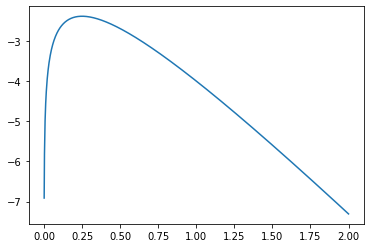

In [8]:
plt.plot(mu,Posterior)

In [28]:
ii = np.where( Posterior == np.amax(Posterior) )
muhat = (mu[ii][0])
print(muhat)

0.24912412412412413


In [10]:
nll = lambda *p : LogPosterior(*p)
nll(0.3,data)

-2.4039728043259356

In [19]:
n_walkers, n_params = 5,1
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 1
p0
p0 += np.random.rand(n_walkers, n_params)
p0

array([[1.8791572 ],
       [1.06449849],
       [1.37631689],
       [1.98590856],
       [1.52585282]])

In [20]:
sampler = emcee.EnsembleSampler( n_walkers, n_params, nll, args=[data] )
pos,prob,state,_=sampler.run_mcmc(p0,10000,progress=True)

100%|████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 491.68it/s]


Text(0.5, 0, 'step number')

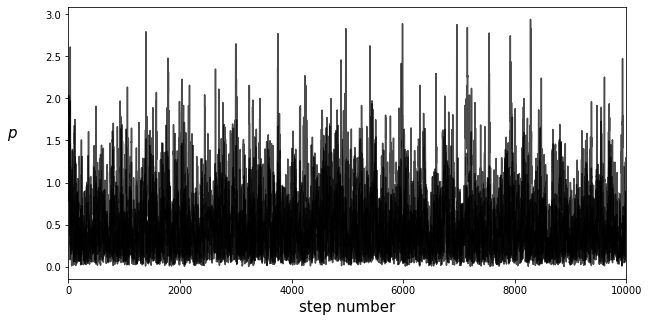

In [21]:
fig, axes = plt.subplots(n_params, figsize=(10, 5), sharex=True)

samples = sampler.get_chain()
labels = ["$p$"]

for i in range(n_params):
    #ax = axes[i]
    axes.plot(samples[:,:,i], "k", alpha=0.7)
    axes.set_xlim(0, len(samples))
    axes.set_ylabel(labels[i],rotation=0, fontsize=15)
    axes.yaxis.set_label_coords(-0.1, 0.5)

axes.set_xlabel("step number",fontsize=15)

In [22]:
flat_samples = sampler.get_chain( discard=500, flat=True )
truths = np.percentile(flat_samples, 50, axis=0)

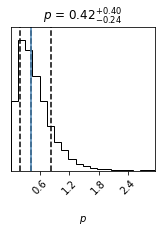

In [24]:
figure = corner.corner(flat_samples,truths=truths, labels=labels, quantiles=[0.16,0.5,0.84], show_titles=True)

In [25]:
lista = samples[:,:,0][:,0]
lista

array([1.52030455, 1.69179643, 1.72143142, ..., 0.64034789, 0.5432581 ,
       0.6071104 ])

(array([2941., 3796., 1929.,  804.,  325.,  147.,   38.,    8.,    7.,
           5.]),
 array([2.68747901e-03, 2.90195879e-01, 5.77704279e-01, 8.65212678e-01,
        1.15272108e+00, 1.44022948e+00, 1.72773788e+00, 2.01524628e+00,
        2.30275468e+00, 2.59026308e+00, 2.87777148e+00]),
 <BarContainer object of 10 artists>)

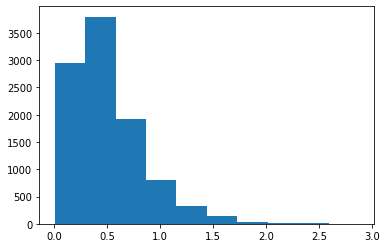

In [29]:
plt.hist(lista)